In [1]:
import numpy as np
import numpy.linalg as la


In [2]:
def barycentric_coords(vertices, point):
    T = (np.array(vertices[:-1])-vertices[-1]).T
    v = np.dot(la.inv(T), np.array(point)-vertices[-1])
    v.resize(len(vertices))
    v[-1] = 1-v.sum()
    return v

In [3]:
# Base triangle

aX=32.97
aY=125.52

bX=344.18
bY=97.08

cX=228.47
cY=178.58


pX = 302.13
pY = 121.12

In [4]:
# barycentric coordinates

bCoords = barycentric_coords([ [aX, aY],[bX, bY],[cX, cY]], [pX,pY])

bCoords

array([0.02923988, 0.68599426, 0.28476586])

In [5]:
# New triangle

AX=226.53
AY=126.77

BX=276.47
BY=131.71

CX=225.37
CY=173.91


X = bCoords[0]*AX + bCoords[1]*BX + bCoords[2]*CX
Y = bCoords[0]*AY + bCoords[1]*BY + bCoords[2]*CY

print(X,Y)

260.4582249294207 143.58267447508052


# Plot

### Plot 1

In [6]:
aX=250
aY=210

bX=1000
bY=175

cX=1040
cY=265


pX1 = 690
pY1 = 200

pX2 = 925
pY2 = 210

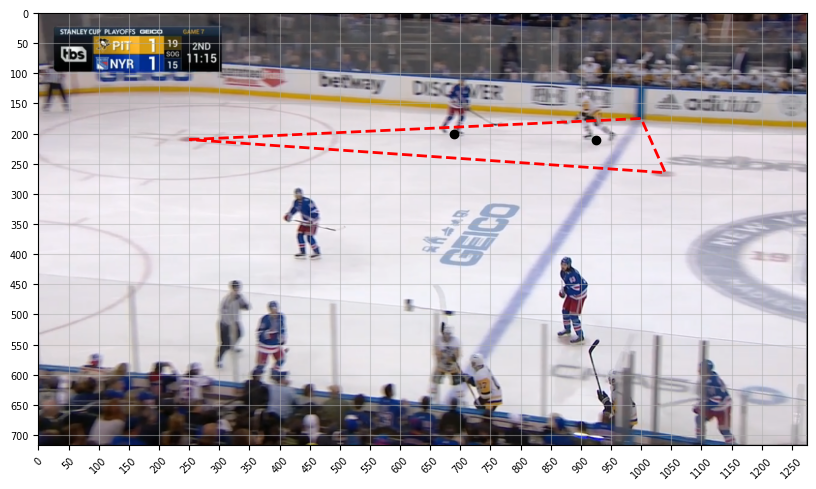

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

#fig.set_size_inches(18.5, 10.5)
plt.rcParams["figure.figsize"] = (16,5)
plt.rcParams["figure.autolayout"] = True
fig.set_dpi(100)

major_ticks = np.arange(0, 1900, 50)
minor_ticks = np.arange(0, 800, 50)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
plt.xticks(fontsize=7,rotation = 45)
plt.yticks(fontsize=7)
ax.grid(which='both', alpha=0.5)
coords = []


img = plt.imread("../data/games-captures/game-a-001.png")
ax.imshow(img)

x = [aX,bX, cX, aX]
y = [aY,bY,cY,aY]
ax.plot(x, y, '--', linewidth=2, color='red')

x = [pX1, pX2]
y = [pY1, pY2]

ax.plot(x, y, '.', linewidth=2, color='black', markersize=12 )

ax.imshow(img)

plt.savefig('./output/001_game-a-001.png')


### Coordenates

In [12]:
bCoords1 = barycentric_coords([ [aX, aY],[bX, bY],[cX, cY]], [pX1,pY1])
bCoords2 = barycentric_coords([ [aX, aY],[bX, bY],[cX, cY]], [pX2,pY2])

bCoords1, bCoords2

(array([0.41944848, 0.4658926 , 0.11465893]),
 array([0.11828737, 0.53882438, 0.34288824]))

### Plot 2

In [13]:
AX=105
AY=70

BX=253
BY=0

CX=270
CY=70


X1 = bCoords1[0]*AX + bCoords1[1]*BX + bCoords1[2]*CX
Y1 = bCoords1[0]*AY + bCoords1[1]*BY + bCoords1[2]*CY

X2 = bCoords2[0]*AX + bCoords2[1]*BX + bCoords2[2]*CX
Y2 = bCoords2[0]*AY + bCoords2[1]*BY + bCoords2[2]*CY

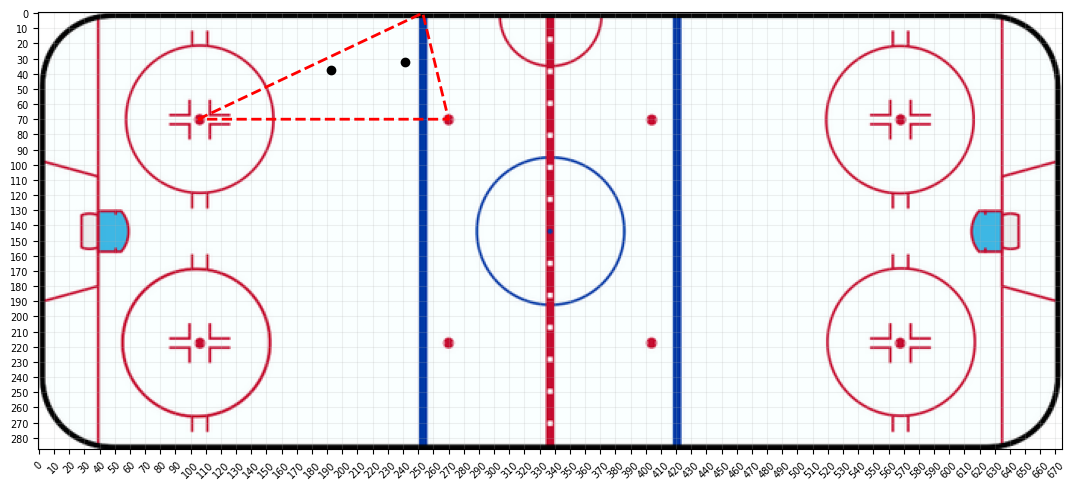

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

#fig.set_size_inches(18.5, 10.5)
plt.rcParams["figure.figsize"] = (16,5)
plt.rcParams["figure.autolayout"] = True
fig.set_dpi(100)

major_ticks = np.arange(0, 1900, 10)
minor_ticks = np.arange(0, 800, 10)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

plt.xticks(fontsize=7,rotation = 45)
plt.yticks(fontsize=7)

ax.grid(which='both', alpha=0.2)


img = plt.imread("./assets/NHL_Hockey_Rink.png")

ax.imshow(img)

x = [AX,BX, CX, AX]
y = [AY,BY,CY,AY]
ax.plot(x, y, '--', linewidth=2, color='red')

x = [X1, X2]
y = [Y1, Y2]

ax.plot(x, y, '.', linewidth=2, color='black', markersize=12)

ax.imshow(img)
plt.savefig('./output/001_game-a-001_plot.png')

## Is point in triangle

In [15]:
class Vector:
    def __init__(self, x, y):
        self.x = x
        self.y = y


In [16]:
def isPointInTriangle(p, p0, p1, p2):
    dX = p.x-p2.x;
    dY = p.y-p2.y;
    dX21 = p2.x-p1.x;
    dY12 = p1.y-p2.y;
    D = dY12*(p0.x-p2.x) + dX21*(p0.y-p2.y);
    s = dY12*dX + dX21*dY;
    t = (p2.y-p0.y)*dX + (p0.x-p2.x)*dY;
    if D<0:
        return s<=0 and t<=0 and s+t>=D;
    return s>=0 and t>=0 and s+t<=D;


In [17]:
a = Vector( 45.46, 246.01)
b = Vector( 195.42, 71)
c = Vector( 320.48, 195.97)

p = Vector( 270.29, 107.38)

In [18]:
isPointInTriangle(p, a, b, c)

False

---

## Notes

In [19]:
def triangle_area(tri):
    x1, y1, x2, y2, x3, y3 = tri[0][0], tri[0][1], tri[1][0], tri[1][1], tri[2][0], tri[2][1]
    return abs(0.5 * (((x2-x1)*(y3-y1))-((x3-x1)*(y2-y1))))

In [20]:
# Base triangle

aX=1
aY=5

bX=11
bY=10

cX=10
cY=1


pX = 11
pY = 8

In [21]:
# Areas

abc = triangle_area( [ [aX, aY],[cX,cY],[bX, bY] ] ) 

l1 = triangle_area( [ [bX, bY],[cX, cY],[pX,pY] ] ) /abc # w
l2 = triangle_area( [ [cX, cY],[aX, aY],[pX,pY] ] ) /abc # u
l3 = triangle_area( [ [aX, aY],[pX,pY],[bX, bY] ] ) /abc # v

print(abc)

42.5


In [22]:
# conversion from barycentric coordinates to Cartesian coordinates

x = l1*aX + l2*bX + l3*cX
y = l1*aY + l2*bY + l3*cY

print(x,y)

11.047058823529412 8.235294117647058


In [23]:
# https://www.scratchapixel.com/lessons/3d-basic-rendering/ray-tracing-rendering-a-triangle/barycentric-coordinates
# https://stackoverflow.com/questions/43541934/implementing-3d-vectors-in-python-numpy-vs-x-y-z-fields
# https://en.wikipedia.org/wiki/Barycentric_coordinate_system
# https://cs184.eecs.berkeley.edu/sp19/lecture/5-14/texture-mapping
# https://blender.stackexchange.com/questions/23326/find-a-corresponding-point-on-a-transformed-mesh
# https://stackabuse.com/affine-image-transformations-in-python-with-numpy-pillow-and-opencv/